In [1]:
from IPython.display import Image

# Exam of Bayesian Machine Learning:
# Comparison between Supervised Learning with Quantum-Inspired Tensor Network, SVM and Naive Based

## Luca Calderaro, Marco Avesani

### 18/07/2017

# Tensor Network Notation



Tensors are a generalisation of vectors and matrices.
In tensor network notation (TNN) a single tensor is simply represented by a geometric shape with legs sticking out of it, each corresponding to an index.

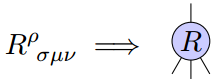

In [2]:
Image(filename='images/Tensor0.png')

The main advantage in TNN comes in representing tensors that are themselves composed of several other tensors.

### Tensor product

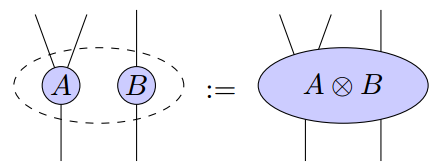

In [3]:
Image(filename='images/TNN0.png')

### Trace

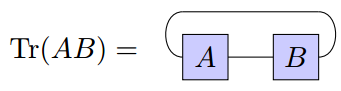

In [4]:
Image(filename='images/Trace.png')

### Contraction

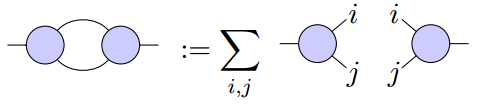

In [5]:
Image(filename='images/Contraction.png')

# Matrix Product States

Matrix product states (MPS) are a natural choice for efficient representation of 1D quantum low
energy states of physically realistic systems. 

In [6]:
%%latex
$|\psi> = \sum_{j_1 ... j_N} C_{j_1 ... j_N} |j_1> \dotsb |j_N>$

<IPython.core.display.Latex object>

The state is completely specified by knowledge of the rank-N tensor C.
MPS consists of approximating the above state as a contraction of N tensors of rank 1. This is achieved with the following steps:

Schmidt decomposition to split the tensor into two parts

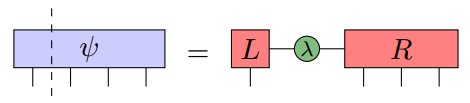

In [7]:
Image(filename='images/Schmidt.png')

With successive singular value decompositions

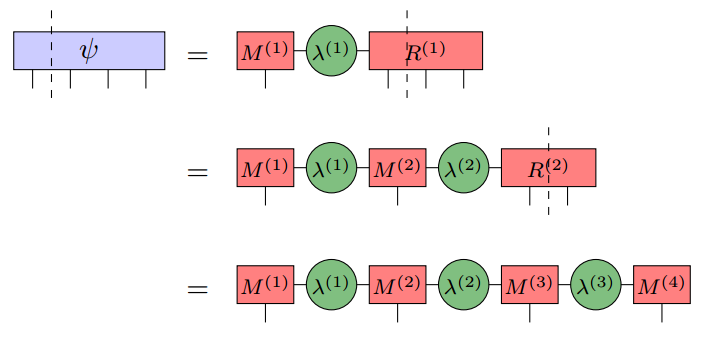

In [8]:
Image(filename='images/SuccessiveSchmidt.png')

We obtain the MPS by contracting the singular values tensors $\lambda$ into the local tensors $M$

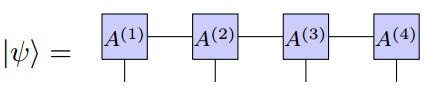

In [9]:
Image(filename='images/MPS.png')

Suppose that only D of the Schmidt weights were non-zero or "close to zero". 
Then we can use the MPS form to take advantage of this by truncating the $\lambda$ matrix. There are many relevant states for which this guarantee good approximation.

# Supervised Learning with Quantum-Inspired Tensor Networks

We have a set of very large vectors $\mathbf{x}$, that are classified by a decision function

In [10]:
%%latex
$f(\mathbf{x}) = W \cdot \Phi(\mathbf{x})$

<IPython.core.display.Latex object>

The feature vector $\Phi(\mathbf{x})$ maps the input vectors $\mathbf{x}$ into a higher dimensional space.
The training consists of finding the optimal weight vector $W$, which can be a difficult task since $W$ can be exponentially large. 
In https://arxiv.org/pdf/1605.05775.pdf the authors find that the optimal weight vector can be approximated as a tensor network. Their approach have the following consequences:
Training the model scales linearly in the training set size.
Tensor networks are also adaptive: dimensions of tensor indices internal to the network grow and shrink during training to concentrate resources on the particular correlations within the data most useful for learning.

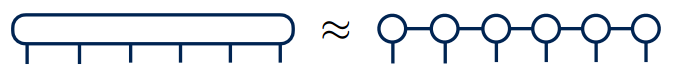

In [11]:
Image(filename='images/WeightTensor.png')

## The feature map

Choose a feature map of the form

In [12]:
%%latex
$\Phi^{s_1 \dotsc s_N}(\mathbf{x}) = \phi^{s_1}(x_1) \otimes \dotsb \otimes \phi^{s_N}(x_N)$

<IPython.core.display.Latex object>

being $\phi^{s_i}(x_i)$ the local feature map and the indices $s_i$ run from $1$ to $d$.
A simple choice

In [13]:
%%latex
$\phi^{s_i}(x_i) = [\cos(\frac{\pi}{2}x_i), \sin(\frac{\pi}{2}x_i)]$

<IPython.core.display.Latex object>

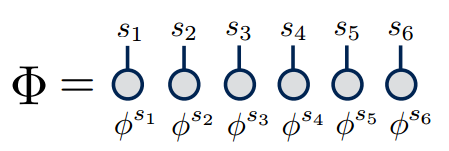

In [14]:
Image(filename='images/FeatureMap.png')

Tensor network are widely used in statistical mechanics for the study of spin-chain system.  
The choice of this particular feature map translates the original problem in a spin-chain system of dimension 2

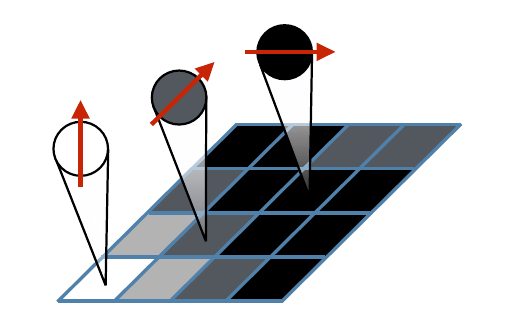

In [15]:
Image(filename='images/spin.png')

## Multiple label classification

Define a set of decision functions labeled by a index $l$

In [16]:
%%latex
$f^l(\mathbf{x}) = W^l \cdot \Phi(\mathbf{x})$

<IPython.core.display.Latex object>

The input $\mathbf{x}$ is classified by choosing the label $l$ for which $|f^l(\mathbf{x})|$ is largest. $W^l$ is a tensor of order N+1.

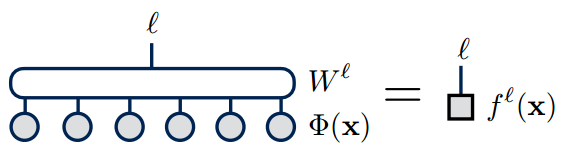

In [17]:
Image(filename='images/MultipleDecisionFunction.png')

## MPS approximation

$W$ is approximated as an MPS

In [18]:
%%latex
$W_{s_1 \dotsb s_N}^l = \sum_{[\alpha]} A_{s_1}^{\alpha_1} A_{s_2}^{\alpha_1 \alpha_2} \dotsb A_{s_i}^{l; \alpha_i \alpha_{i+1}} \dotsb A_{s_N}^{\alpha_N}$

<IPython.core.display.Latex object>

The $[\alpha]$ indices represent the bound. The index $l$ can be arbitrarily placed on the i-th tensor.

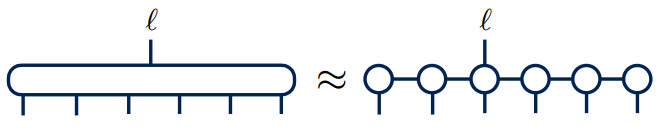

In [19]:
Image(filename='images/WMPS.png')

## Sweeping algorithm for optimizing weights

Minimize the quadratic cost function

In [20]:
%%latex
$C = \frac{1}{2} \sum_{n=1}^{N_T} \sum_l (f^l(\mathbf{x}_n) - \delta^l_{L_n})^2$

<IPython.core.display.Latex object>

$n$ runs over the $N_T$ training inputs and $L_n$ is the known correct label for training input n.


\begin{equation*}
B^{'l} = B^l + \Delta B^l
\end{equation*}

In [21]:
%%latex
\begin{align}
\Delta B^l &= - \frac{\partial C}{\partial B^l} \\
&= \sum_{n=1}^{N_T} ( \delta^l_{L_n} - f^l(\mathbf{x}_n) ) \tilde{\Phi}_n
\end{align}

<IPython.core.display.Latex object>

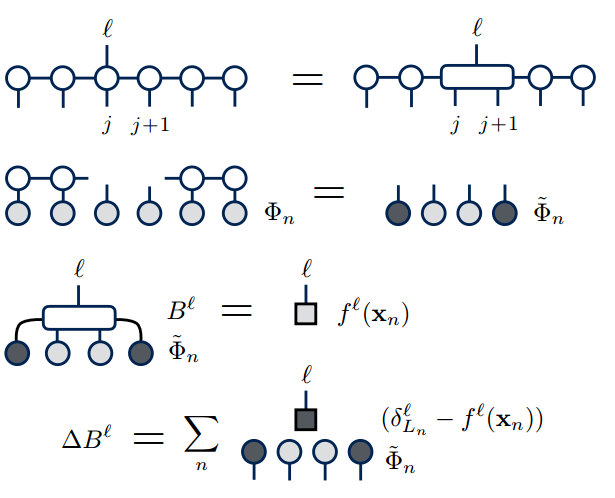

In [22]:
Image(filename='images/Sweeping.png')

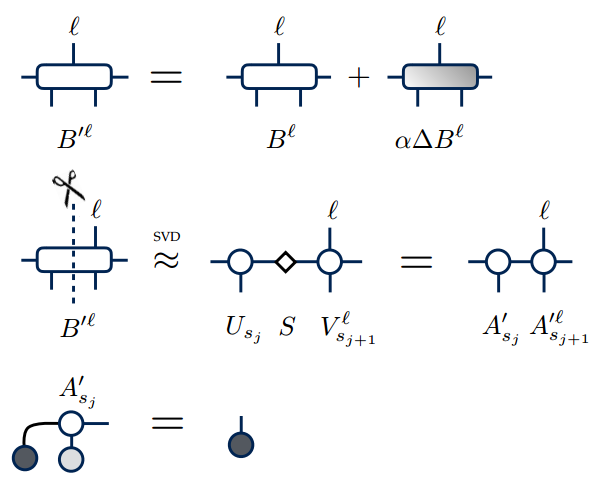

In [23]:
Image(filename='images/Sweeping2.png')

## Toy Model

The input vectors are sampled from two distribution $P_A$ and $P_B$. Two dimensional input space $\mathbf{x}_n = (x_n, y_n)$ mapped to a tensor $\Phi(\mathbf{x}_n) = \phi(x_n) \otimes \phi(y_n)$. The main control parameter is the local dimension $d$.

for $d=2$ 

$$\begin{equation} \phi(x_i) = [\cos(\frac{\pi}{2}x_i), \sin(\frac{\pi}{2}x_i)] \end{equation}$$

for general $d$

$$\begin{equation} \phi^{s_j}(x_i) = \sum_{p=0}^{d-1} \left( d-1, p \right) \cos^{d-s_j}(\frac{\pi}{2}x_i) \sin^{s_j-1}(\frac{\pi}{2}x_i) \end{equation}$$

# Classical Supervised Learning Algorithms
To test the performance of the Tensor Network we compared it with other popular supervised learning algorithm:
*  Support Vector Machines (SVM)
*  Naive Bayes


# Support Vector Machine

<div style= "float:right;position: relative; top: 0px;">
![svm](./images/svm.png "Logo Title Text 1")
</div>
Is a supervised learning algorithm mainly used for classification.  

In its standard form finds the optimal hyperplanes that maximally separate the data.  
  
The core idea is that only the data that lies on the boundary are relevant for the solution

<div style= "float:right;position: relative; top: 0px;">
![svm](./images/svm.png "Logo Title Text 1")
</div>

For example,  consider the binary case with $\vec{x}_i$ data points and $y_i=\pm 1$ labels  

$\vec{w}\cdot \vec(x)-b=0$ defines an hyperplane  

Renormalizing $\vec{w}$ and $b$ we can have the hyperplanes $\vec{w}\cdot \vec(x_i)-b=\pm 1$ to separate the two classes...  

The training condition can be written: $y_i(\vec{w}\cdot \vec(x_i)-b)\geq 1$

<div style= "float:right;position: relative; top: 0px;">
![svm](./images/svm.png "Logo Title Text 1")
</div>

The optimal decision hyperplane is the one that maximizes:

\begin{equation*}
\text{Margin:}  \left\lVert \frac{2}{\vec{w}} \right\rVert
\end{equation*}
  
Then we have to solve an optimization problem:

\begin{equation*}
\begin{aligned}
& \underset{\vec{w}}{\text{minimize}}
& & \left\lVert \frac{2}{\vec{w}} \right\rVert \\
& \text{subject to}
& & y_i(\vec{w}\cdot \vec(x_i)-b)\geq\pm 1
\end{aligned}
\end{equation*}
  
Having the optimal $\vec{w^*}$, the classification is straightforward:
\begin{equation*}
y_{new}=\text{sign}(\vec{w^*}\cdot\vec{x_{new}}+b)
\end{equation*}


## Soft-Margin and Tuning: $C$ and $\gamma$

The constraint $y_i(\vec{w}\cdot \vec(x_i)-b)\geq\pm 1$ imposes that no data lies between $\vec{w}\cdot \vec x_i-b=\pm 1$ but if the problem isn't linearly separable, this condition cannot be met for all the $x_i$.  
So one can introduce positive slack-variable in $\zeta_i$ and loose the constraint:
$y_i(\vec{w}\cdot \vec(x_i)-b)\geq\pm 1+ \zeta_i$

Then the problem becomes:
\begin{equation*}
\begin{aligned}
& \underset{\vec{w}}{\text{minimize}}
& & \left\lVert \frac{2}{\vec{w}} \right\rVert +C\sum_i \zeta_i\\
& \text{subject to}
& & y_i(\vec{w}\cdot \vec(x_i)-b)\geq\pm 1 +\zeta_i
\end{aligned}
\end{equation*}

With C that controls the penalty to the misclassified points.

$\gamma$ is the free parameter in the Radial Basis Function Kernel:
\begin{equation*}
K(x,x')=exp(-\gamma \left\lVert x-x'\right\rVert )
\end{equation*}
and regulates how far the influence of a single training example reaches

The dual form of the optimization problem involves only internal products between the $\vec{x_i}$.  

This feature permits to generalize the SVM outside the linear case substituting the dot products with kernel matrix $K(x,x')=\langle \psi(\vec x)| \psi(\vec x')\rangle$...
  
In this way the data are mapped into an higher dimensional space and problems that were not linearly separable become linearly separable in this higher dimensional space  



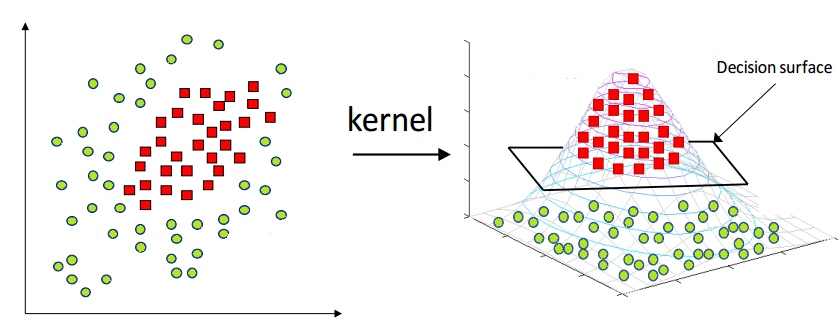

In [24]:
Image(filename='images/kernel.png')

In our code we compared the Tensor Network to Linear, Polylnomial and Gaussian Kernels for the SVM

# Naive Bayes

The Naive Bayes classifier is, as the name suggests, a classifier based on the Bayes Theorem...  
The suffix Naive is related to a strong approximation about the independence of the conditional probabilities...  

In a classification problem we are interested in the probability that an object belongs to one class $y_i$ given the knowledge of some data vector $\vec x=(x_1,...,x_n)$ that describes the object.
Applying the Bayes theorem we get:
\begin{equation}
P(y_i | \vec x)=\frac{P( \vec x | y_i )P(y_i)}{P(\vec x)}=\frac{P( \vec x , y_i )}{P(\vec x)}
\end{equation}
Now, $P(\vec x)$ is constant and using the independence assumption:
\begin{equation}
P(y_i | \vec x)=kP(y_i)\prod_j P( x_j |  y_i )
\end{equation}


This has a simple Bayesian Network interpretation:

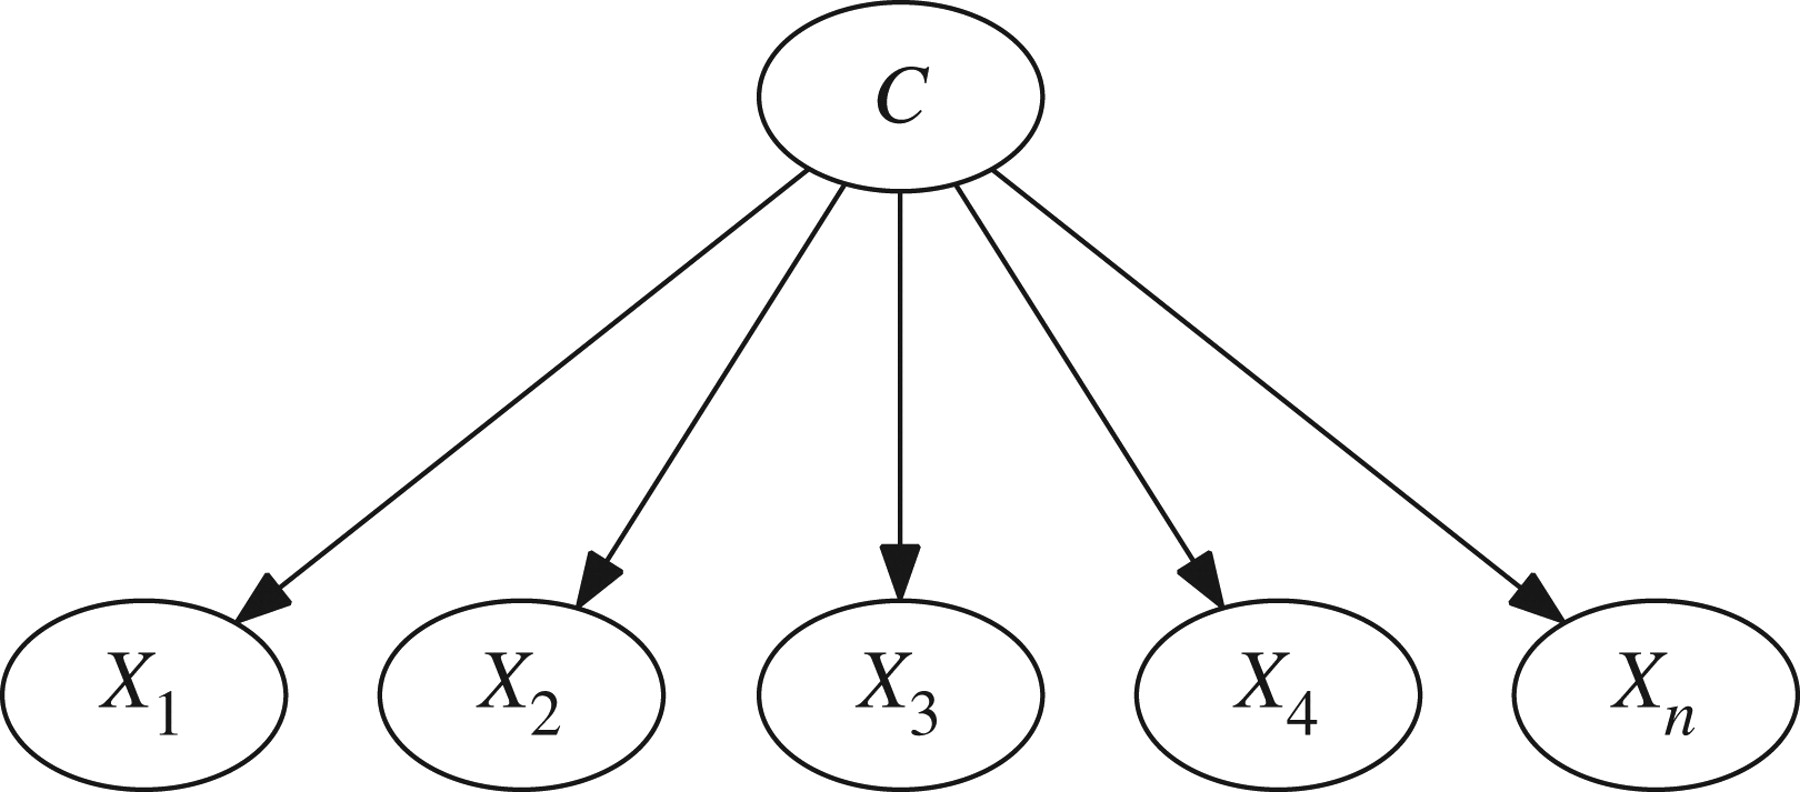

In [25]:
Image(filename="images/nb.jpg",height=500,width=500)

But other more complicate networks leads to different and more sophisticated classification algorithms.

The estimation of $P( x_j |  y_i )$ in the continous case, is done by modeling it with a probability density function.  
Usually a gaussian function is used so that:
\begin{equation}
P(x_j | y_i)=\frac{1}{\sqrt{2\pi\sigma^2_{ij}}}e^{-\left(\frac{(x_j-\mu_{ij})^2}{2\sigma_{ij}^2}\right)}
\end{equation}
where $\mu_{ij}$ and $\sigma_{ij}$ are the mean and the standard deviation of the component $j$ of the data vector on the training dataset belonging to the classification category $C_i$.  
Other choices can be the Bernoulli pdf or multivariate pdf..

## Pro of Naive Bayes:
* Closed form solution
* Easy implementation
* Good performance also with small training datasets
* Small computational complexity

## Cons of Naive Bayes:
* By nature, it cannot grasp corrlations in the parameters


# Code implementation

In [26]:
import plotly.offline as ply
ply.init_notebook_mode(connected=True)

import numpy as np
import scipy as sp
import pandas as pd
from scipy.special import binom
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly
import pandas as pd
import mpnum as mp
import sklearn

from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from numba import autojit

import plotly.plotly as py
from plotly.graph_objs import *
%load_ext line_profiler
#%matplotlib notebook

Define the functions for the classification:

In [27]:
@autojit
def feature_map(x):
    """Local feature map"""
    
    x_arr = 0.5 * np.pi * np.array([x]*d)
    s = np.arange(d)
    return np.sqrt(binom([d-1]*d,s)) * np.power(np.cos(x_arr), d-1-s) * np.power(np.sin(x_arr), s)

@autojit
def Tdelta(l):
    """Create a tensor kronecker delta"""
    return mp.MPArray.from_kron([np.array([1-l,l])])

@autojit
def evaluate(Tweight, x, y):
    """ Evaluate the tensor network and train the tensor """
    xy_mpa = mp.MPArray.from_kron([feature_map(x),feature_map(y)]).group_sites(2) # feature tensor
    Tf = mp.dot(Tweight,xy_mpa,axes=([1,2],[0,1]))
    W0 = mp.dot(Tf, Tdelta(0)).to_array()
    W1 = mp.dot(Tf, Tdelta(1)).to_array()
    Wdiff = W0 - W1
    Wsum = W0 + W1
    return Wdiff * Wsum / np.abs(Wdiff * Wsum)

#Vectorize the tn evaluate function so that can handle arrays 
vector_evaluate=np.vectorize(evaluate,excluded=['Tweight'])

In [28]:
@autojit
def update2sites(data, label, Tweight):    
    TdeltaB = mp.MPArray.from_kron([np.array([0]*2), np.array([0]*d), np.array([0]*d)]).group_sites(3) #null tensor deltaB (single size)
    for idx in range(len(data)):
        # create the full feature map
        xy_mpa = mp.MPArray.from_kron([feature_map(data[idx][0]),feature_map(data[idx][1])]).group_sites(2) # feature tensor
        # tensot product between the weights and the feature map
        Tf = mp.dot(Tweight,xy_mpa,axes=([1,2],[0,1])) # the last two physical legs are of Tweight are contracted with the feature tensor
        Tcoef = (Tdelta(label[idx]) - Tf)
        Ttemp = mp.MPArray.from_kron([Tcoef.to_array(), xy_mpa.to_array()]).group_sites(2)
        TdeltaB = TdeltaB + Ttemp
    
    Tweight = Tweight + alpha * TdeltaB
    return Tweight

class nbayes:
    """This class implements the Naive Bayes Classifier for our data """
    def __init__(self):
        i = 0

    def learn(self, data, label):
        data_temp = np.array(data)
        label_temp = np.array(label)
        self.index0 = np.where(label == 0)
        self.index1 = np.where(label == 1)
        self.meanx0 = (data_temp[self.index0].T[0]).mean()
        self.meany0 = (data_temp[self.index0].T[1]).mean()
        self.varx0 = (data_temp[self.index0].T[0]).var()
        self.vary0 = (data_temp[self.index0].T[1]).var()
        self.meanx1 = (data_temp[self.index1].T[0]).mean()
        self.meany1 = (data_temp[self.index1].T[1]).mean()
        self.varx1 = (data_temp[self.index1].T[0]).var()
        self.vary1 = (data_temp[self.index1].T[1]).var()
        self.p0 =  (len(self.index0[0]))/float(len(data_temp))
        self.p1 = (len(self.index1[0]))/float(len(data_temp))
        #print((self.p0))
        #print((self.p1))

    def classify(self, data):
        pr0 = self.p0 * self.gauss(data[0], self.meanx0, self.varx0) * \
            self.gauss(data[1], self.meany0, self.vary0)
        pr1 = self.p1 * self.gauss(data[0], self.meanx1, self.varx1) * \
            self.gauss(data[1], self.meany1, self.vary1)
        normalization=pr0+pr1
        pr0=pr0/normalization
        pr1=pr1/normalization
        if(pr0 > pr1):
            return 0
        else:
            return 1
    def gauss(self, x, mean, var):
        return ((1. / (np.sqrt(2 * np.pi * var))) * np.exp(-1*((x - mean)**2) / (2. * var)))

    def score(self, data, label):
        right = 0
        for i in range(0, len(data)):
            if(self.classify(data[i]) == label[i]):
                right = right + 1
        #print(("Percentage: " + str(float(right) / float(len(data)))))
        return float(right) / float(len(data))
    
    def predict_proba(self,data):
        self.data=np.array(data)[0]
        pr0 = self.p0 * self.gauss(self.data[0], self.meanx0, self.varx0) * \
            self.gauss(self.data[1], self.meany0, self.vary0)
        pr1 = self.p1 * self.gauss(self.data[0], self.meanx1, self.varx1) * \
            self.gauss(self.data[1], self.meany1, self.vary1)
        return([np.array([pr0,pr1])])


In [29]:
def tn_score(Tweight,data,label):
    """ Evaluate the performance of the TN"""
    score=0
    classified=(vector_evaluate(Tweight,data.T[0],data.T[1]))
    for i,j in enumerate(classified):
        #Convert from notation +-1 to +1,0
        if( -1*((j-1)/2.)==label[i]):
            score=score+1
    return float(score)/len(classified)

def plot_tn_decision_function(Tweight, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 100)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 100)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] =evaluate(Tweight,xi,yj)
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 100)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 100)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.c_[xi.ravel(), yj.ravel()])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
def plot_nb_decision_function(clf, ax=None):
    """Plot the decision function for naive bayes classifier"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 100)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 100)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            prediction=clf.predict_proba(np.c_[xi.ravel(), yj.ravel()])
            #print(prediction)
            if(prediction[0][0]>prediction[0][1]):
                P[i, j] = 1
            else: 
                P[i, j] = -1
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

## Gaussian distributions

This dataset is made of two overlapping 2-D Gaussians spreaded betweeen $[0,1] \times [0,1]$ ( in order to simplify the TN learning):

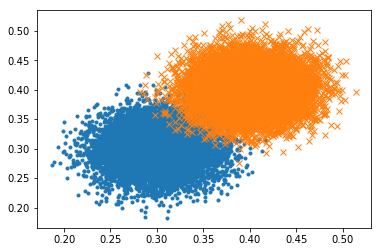

In [30]:
mean1=[0.3,0.3]
cov1=[[0.001,0],[0,0.001]]
mean2=[0.4,0.4]
cov2=[[0.001,0],[0,0.001]]
class0_learning=np.random.multivariate_normal(mean1, cov1, 10000)
class1_learning=np.random.multivariate_normal(mean2, cov2, 10000)

class0_validate=np.random.multivariate_normal(mean1, cov1, 10000)
class1_validate=np.random.multivariate_normal(mean2, cov2, 10000)

f1=plt.figure()
plt.plot(class0_learning.T[0],class0_learning.T[1],".")
plt.plot(class1_learning.T[0],class1_learning.T[1],"x")
plt.show()

numdata = 1000
train_data = np.concatenate([class0_learning[0:numdata], class1_learning[0:numdata]])
label = np.concatenate([np.array([0]*numdata), np.array([1]*numdata)])

validate_data=np.concatenate([class0_validate[0:numdata], class1_validate[0:numdata]])
label_validate=np.concatenate([np.array([0]*numdata), np.array([1]*numdata)])

The parameters are $\mu_1 =0.3$ , $\mu_2 =0.4$ and $\sigma_1=\sigma_2=0.01$  
The size of the training and validation dataset are 10000.

```python
mean1=[0.3,0.3]
cov1=[[0.001,0],[0,0.001]]
mean2=[0.4,0.4]
cov2=[[0.001,0],[0,0.001]]
class0_learning=np.random.multivariate_normal(mean1, cov1, 10000)
class1_learning=np.random.multivariate_normal(mean2, cov2, 10000)

class0_validate=np.random.multivariate_normal(mean1, cov1, 10000)
class1_validate=np.random.multivariate_normal(mean2, cov2, 10000)

f1=plt.figure()
plt.plot(class0_learning.T[0],class0_learning.T[1],".")
plt.plot(class1_learning.T[0],class1_learning.T[1],"x")
#plt.show()
# set data
numdata = 1000
train_data = np.concatenate([class0_learning[0:numdata], class1_learning[0:numdata]])
label = np.concatenate([np.array([0]*numdata), np.array([1]*numdata)])

validate_data=np.concatenate([class0_validate[0:numdata], class1_validate[0:numdata]])
label_validate=np.concatenate([np.array([0]*numdata), np.array([1]*numdata)])
```

## Tensor Network

For this dataset we use a local dimension of 2 for the Tensor Network:  
In this way we reduce the computation complexity and reduce the chances of overfitting

In [31]:
d = 2 # local dimension
rng = np.random.RandomState(seed=143)
Tweight = mp.random_mpa(sites=1, ldim=[[2,d,d]], bdim=1, randstate=rng, normalized=True)

numsteps = 100
alpha = 5e-4 # control convergence

for idx in range(numsteps):
    Tweight = update2sites(train_data, label, Tweight)

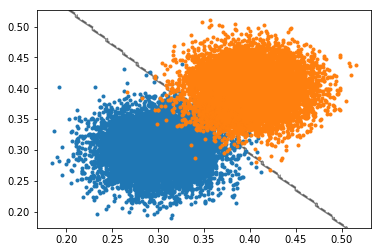

TN Classification fidelity: 0.9865 %


In [32]:
point_to_plot = 10000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_tn_decision_function(Tweight, ax=None)
plt.show()

tn_scored=tn_score(Tweight,validate_data,label_validate)
print("TN Classification fidelity: "+str(tn_scored)+" %")

```python
d = 2 # local dimension
rng = np.random.RandomState(seed=143)
Tweight = mp.random_mpa(sites=1, ldim=[[2,d,d]], bdim=1, randstate=rng, normalized=True)

numsteps = 100
alpha = 5e-4 # control convergence

for idx in range(numsteps):
    Tweight = update2sites(train_data, label, Tweight)

point_to_plot = 10000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_tn_decision_function(Tweight, ax=None)
plt.show()

tn_scored=tn_score(Tweight,validate_data,label_validate)
print("TN Classification fidelity: "+str(tn_scored)+" %")

```

### SVM

With the same dataset we trained a SVM with linear kernel and $C=4$ and $\gamma=1$

In [33]:
# Create SVM classification object 
model = svm.SVC(kernel='linear', C=4, gamma=1) 
model.fit(train_data, label)
svm_scored= model.score(validate_data, label_validate)


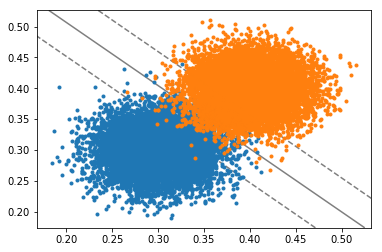

SVM Classification fidelity: 0.987 %


In [34]:
point_to_plot = 10000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_svc_decision_function(model)
plt.show()
print("SVM Classification fidelity: "+str(svm_scored)+ " %")

## Naive Bayes

In [35]:
gnb = GaussianNB()
gnb.fit(train_data,label)
gnb.score(validate_data,label_validate)

0.98650000000000004

In [36]:
nb=nbayes()
nb.learn(train_data,label)
nb_scored=nb.score(validate_data,label_validate)
print("NB Classification fidelity: "+str(nb_scored))

NB Classification fidelity: 0.9865


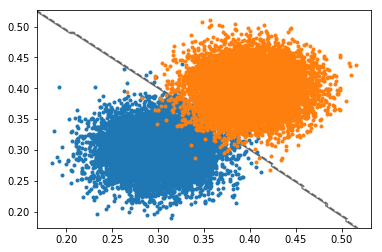

NB Classification fidelity: 0.9865 %


In [37]:
point_to_plot = 10000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_nb_decision_function(gnb)
plt.show()
print("NB Classification fidelity: "+str(nb_scored)+ " %")

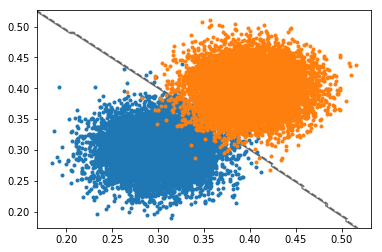

NB Classification fidelity: 0.9865 %


In [38]:
point_to_plot = 10000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_nb_decision_function(nb)
plt.show()
print("NB Classification fidelity: "+str(nb_scored)+ " %")

## Summary: Gaussian Distributions

In [39]:
dataframe_gauss=pd.DataFrame([tn_scored,svm_scored,nb_scored],index=["TN","SVM","NB"],columns=["Gauss"] )
dataframe_gauss

,Gauss
TN,0.9865
SVM,0.9870
NB,0.9865


## Semi circular uniform distributions

In this dataset we generated two concentrical semi-circular uniform distributions, restricted to $[0,1]\times[0,1]$  
The radius of the first goes from 0 to 0.5, while the second goes from 0.5 to 1.

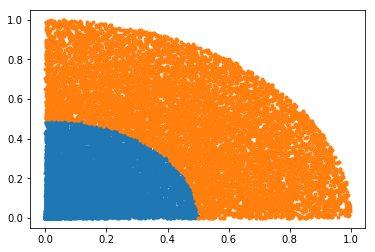

In [40]:
max_data = 10000
class0_radius = np.random.uniform(0, 0.5, max_data)
class0_phase = np.random.uniform(0, 0.5*np.pi, max_data)
class1_radius = np.random.uniform(0.5, 1, max_data)
class1_phase = np.random.uniform(0, 0.5*np.pi, max_data)

x0 = np.array([class0_radius*np.cos(class0_phase)])
y0 = np.array([class0_radius*np.sin(class0_phase)])
class0_learning = np.concatenate((x0.T, y0.T), axis=1)

x1 = np.array([class1_radius*np.cos(class1_phase)])
y1 = np.array([class1_radius*np.sin(class1_phase)])
class1_learning = np.concatenate((x1.T, y1.T), axis=1)

class0_radius_validate = np.random.uniform(0, 0.5, max_data)
class0_phase_validate = np.random.uniform(0, 0.5*np.pi, max_data)
class1_radius_validate = np.random.uniform(0.5, 1, max_data)
class1_phase_validate = np.random.uniform(0, 0.5*np.pi, max_data)

x0_validate = np.array([class0_radius_validate*np.cos(class0_phase_validate)])
y0_validate = np.array([class0_radius_validate*np.sin(class0_phase_validate)])
class0_validate = np.concatenate((x0_validate.T, y0_validate.T), axis=1)

x1_validate = np.array([class1_radius_validate*np.cos(class1_phase_validate)])
y1_validate = np.array([class1_radius_validate*np.sin(class1_phase_validate)])
class1_validate = np.concatenate((x1_validate.T, y1_validate.T), axis=1)

plt.plot(class0_learning[:,0], class0_learning[:,1], '.')
plt.plot(class1_learning[:,0], class1_learning[:,1], '.')
plt.show()

In [41]:
# set data
numdata = 1000
train_data = np.concatenate([class0_learning[0:numdata], class1_learning[0:numdata]])
label = np.concatenate([np.array([0]*numdata), np.array([1]*numdata)])

validate_data=np.concatenate([class0_validate[0:numdata], class1_validate[0:numdata]])
label_validate=np.concatenate([np.array([0]*numdata), np.array([1]*numdata)])

### Tensor network

For this dataset we used a local dimension of $3$

In [42]:
d = 3
rng = np.random.RandomState(seed=143)
Tweight = mp.random_mpa(sites=1, ldim=[[2,d,d]], bdim=1, randstate=rng, normalized=True)

In [43]:
numsteps = 300
alpha = 1e-3 # control convergence

for idx in range(numsteps):
    Tweight = update2sites(train_data, label, Tweight)

In [44]:
tn_scored=tn_score(Tweight,validate_data,label_validate)
print("TN Classification fidelity: "+str(tn_scored)+ " %")

TN Classification fidelity: 0.9815 %


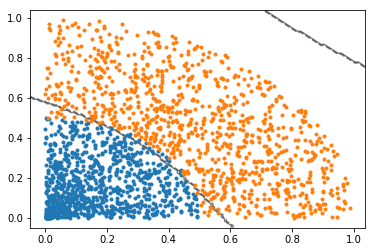

TN Classification fidelity: 0.9815 %


In [45]:
point_to_plot = 1000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_tn_decision_function(Tweight, ax=None)
plt.show()
print("TN Classification fidelity: "+str(tn_scored)+ " %")

### SVM

In order to deal with this non linearly separable set, we used the kernel trick with a polynomial kernel.  
Again, the parameter $C=4$ and $\gamma=4$

In [46]:
# Create SVM classification object 
model = svm.SVC(kernel='poly', C=4, gamma=4) 
model.fit(train_data, label)
svm_scored= model.score(validate_data, label_validate)


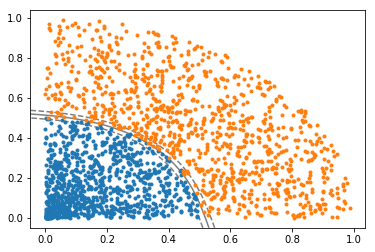

SVM Classification fidelity: 0.9985 %


In [47]:
point_to_plot = 1000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_svc_decision_function(model)
plt.show()
print("SVM Classification fidelity: "+str(svm_scored)+ " %")

### Naive Bayes

In [48]:
gnb = GaussianNB()
gnb.fit(train_data,label)
#print(gnb.score(validate_data,label_validate))
nb=nbayes()
nb.learn(train_data,label)
nb_scored=nb.score(validate_data,label_validate)
print("NB Classification fidelity: "+str(nb_scored)+ " %")

NB Classification fidelity: 0.956 %


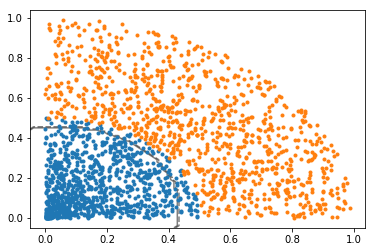

NB Classification fidelity: 0.956 %


In [49]:
point_to_plot = 1000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_nb_decision_function(nb)
plt.show()
print("NB Classification fidelity: "+str(nb_scored)+ " %")

## Summary: Semi circular uniform distributions

In [50]:
dataframe_semi_circ=pd.DataFrame([tn_scored,svm_scored,nb_scored],index=["TN","SVM","NB"],columns=["Semi Circular"] )
dataframe_semi_circ

,Semi Circular
TN,0.9815
SVM,0.9985
NB,0.9560


## Circular distribution

In this dataset we generated two concentrical circular uniform distributions, restricted to $[0,1]\times[0,1]$  
They're both centered around 0.5. The radius of the first goes from 0 to 0.5, while the second goes from 0.5 to 1.

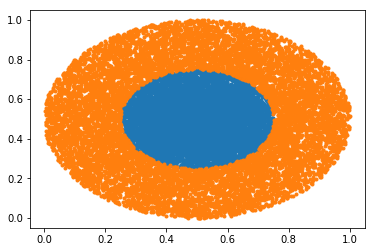

In [51]:
max_data = 10000
class0_radius = np.random.uniform(0, 0.5, max_data)
class0_phase = np.random.uniform(0, 2*np.pi, max_data)
class1_radius = np.random.uniform(0.5, 1, max_data)
class1_phase = np.random.uniform(0, 2*np.pi, max_data)

x0 = np.array([class0_radius*np.cos(class0_phase)]) * 0.5 + 0.5
y0 = np.array([class0_radius*np.sin(class0_phase)]) * 0.5 + 0.5
class0_learning = np.concatenate((x0.T, y0.T), axis=1)

x1 = np.array([class1_radius*np.cos(class1_phase)]) * 0.5 + 0.5
y1 = np.array([class1_radius*np.sin(class1_phase)]) * 0.5 + 0.5
class1_learning = np.concatenate((x1.T, y1.T), axis=1)

class0_radius_validate = np.random.uniform(0, 0.5, max_data)
class0_phase_validate = np.random.uniform(0, 2*np.pi, max_data)
class1_radius_validate = np.random.uniform(0.5, 1, max_data)
class1_phase_validate = np.random.uniform(0, 2*np.pi, max_data)

x0_validate = np.array([class0_radius_validate*np.cos(class0_phase_validate)]) * 0.5 + 0.5
y0_validate = np.array([class0_radius_validate*np.sin(class0_phase_validate)]) * 0.5 + 0.5
class0_validate = np.concatenate((x0_validate.T, y0_validate.T), axis=1)

x1_validate = np.array([class1_radius_validate*np.cos(class1_phase_validate)]) * 0.5 + 0.5
y1_validate = np.array([class1_radius_validate*np.sin(class1_phase_validate)]) * 0.5 + 0.5
class1_validate = np.concatenate((x1_validate.T, y1_validate.T), axis=1)


plt.plot(class0_learning[:,0], class0_learning[:,1], '.')
plt.plot(class1_learning[:,0], class1_learning[:,1], '.')
plt.show()

In [52]:
# set data
numdata = 1000
train_data = np.concatenate([class0_learning[0:numdata], class1_learning[0:numdata]])
label = np.concatenate([np.array([0]*numdata), np.array([1]*numdata)])

validate_data=np.concatenate([class0_validate[0:numdata], class1_validate[0:numdata]])
label_validate=np.concatenate([np.array([0]*numdata), np.array([1]*numdata)])

### Tensor network

Generate and update a random tensor weight using gradient descent steps

In [53]:
d = 3
rng = np.random.RandomState(seed=143)
Tweight = mp.random_mpa(sites=1, ldim=[[2,d,d]], bdim=1, randstate=rng, normalized=True)

In [54]:
numsteps = 200
alpha = 1e-3 # control convergence

for idx in range(numsteps):
    Tweight = update2sites(train_data, label, Tweight)

In [55]:
tn_scored=tn_score(Tweight,validate_data,label_validate)
print("TN Classification fidelity: "+str(tn_scored)+ " %")

TN Classification fidelity: 0.945 %


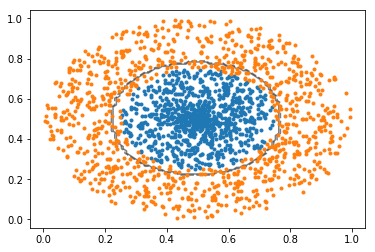

TN Classification fidelity: 0.945 %


In [56]:
point_to_plot = 1000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_tn_decision_function(Tweight, ax=None)
plt.show()
print("TN Classification fidelity: "+str(tn_scored)+ " %")

### SVM

In order to deal with this non linearly separable set, we used the kernel trick with a gaussian kernel.  
Again, the parameter $C=4$ and $\gamma=6$

In [57]:
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=4, gamma=6) 
model.fit(train_data, label)
svm_scored= model.score(validate_data, label_validate)
print("SVM Classification fidelity: "+str(svm_scored)+ " %")

SVM Classification fidelity: 0.9935 %


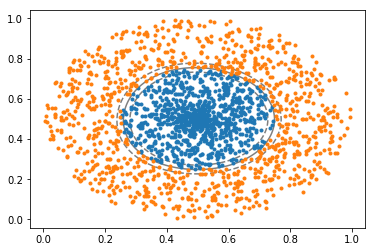

In [58]:
point_to_plot = 1000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_svc_decision_function(model)
plt.show()

### Naive Bayes

In [59]:
gnb = GaussianNB()
gnb.fit(train_data,label)
print(gnb.score(validate_data,label_validate))
nb=nbayes()
nb.learn(train_data,label)
nb_scored=nb.score(validate_data,label_validate)
print("NB Classification fidelity: "+str(nb_scored)+ " %")

0.931
NB Classification fidelity: 0.931 %


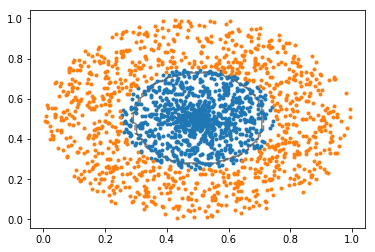

NB Classification fidelity: 0.931 %


In [60]:
point_to_plot = 1000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_nb_decision_function(nb)
plt.show()
print("NB Classification fidelity: "+str(nb_scored)+ " %")

## Summary: Circular uniform distributions

In [61]:
dataframe_circ=pd.DataFrame([tn_scored,svm_scored,nb_scored],index=["TN","SVM","NB"],columns=["Circular"] )
dataframe_circ

,Circular
TN,0.9450
SVM,0.9935
NB,0.9310


## Spiral distributions

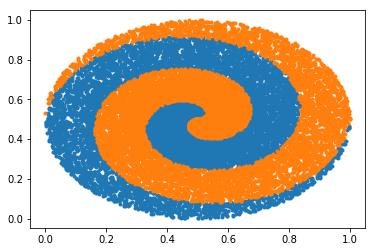

In [62]:
max_data = 10000
max_angle = 3*np.pi
theta = np.random.uniform(0, max_angle, max_data)

class0_phase = np.random.uniform(0, np.pi, max_data)
class1_phase = np.random.uniform(0, -np.pi, max_data)

x0 = np.array([theta * np.cos(theta + class0_phase)]) * 0.5 / max_angle + 0.5
y0 = np.array([theta * np.sin(theta + class0_phase)]) * 0.5 / max_angle + 0.5
class0_learning = np.concatenate((x0.T, y0.T), axis=1)

x1 = np.array([theta * np.cos(theta + class1_phase)]) * 0.5 / max_angle + 0.5
y1 = np.array([theta * np.sin(theta + class1_phase)]) * 0.5 / max_angle + 0.5
class1_learning = np.concatenate((x1.T, y1.T), axis=1)

theta_validate = np.random.uniform(0, max_angle, max_data)

class0_phase_validate = np.random.uniform(0, np.pi, max_data)
class1_phase_validate = np.random.uniform(0, -np.pi, max_data)

x0_validate = np.array([theta_validate * np.cos(theta_validate + class0_phase_validate)]) * 0.5 / max_angle + 0.5
y0_validate = np.array([theta_validate * np.sin(theta_validate + class0_phase_validate)]) * 0.5 / max_angle + 0.5
class0_validate = np.concatenate((x0_validate.T, y0_validate.T), axis=1)

x1_validate = np.array([theta_validate * np.cos(theta_validate + class1_phase_validate)]) * 0.5 / max_angle + 0.5
y1_validate = np.array([theta_validate * np.sin(theta_validate + class1_phase_validate)]) * 0.5 / max_angle + 0.5
class1_validate = np.concatenate((x1_validate.T, y1_validate.T), axis=1)

plt.plot(class0_learning[:,0], class0_learning[:,1], '.')
plt.plot(class1_learning[:,0], class1_learning[:,1], '.')
plt.show()


In [63]:
# set data
numdata = 1000
train_data = np.concatenate([class0_learning[0:numdata], class1_learning[0:numdata]])
label = np.concatenate([np.array([0]*numdata), np.array([1]*numdata)])

validate_data=np.concatenate([class0_validate[0:numdata], class1_validate[0:numdata]])
label_validate=np.concatenate([np.array([0]*numdata), np.array([1]*numdata)])

### Tensor network

Generate and update a random tensor weight using gradient descent steps

In [64]:
d = 70
rng = np.random.RandomState(seed=143)
Tweight = mp.random_mpa(sites=1, ldim=[[2,d,d]], bdim=1, randstate=rng, normalized=True)

In [65]:
numsteps = 130
alpha = 1e-3 # control convergence

for idx in range(numsteps):
    Tweight = update2sites(train_data, label, Tweight)

In [66]:
tn_scored=tn_score(Tweight,validate_data,label_validate)
print("TN Classification fidelity: "+str(tn_scored)+ " %")

TN Classification fidelity: 0.9525 %


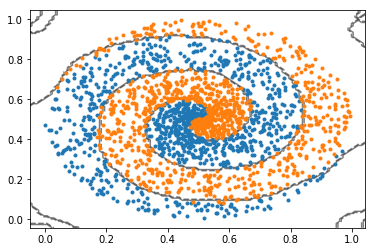

TN Classification fidelity: 0.9525 %


In [67]:
point_to_plot = 1000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_tn_decision_function(Tweight, ax=None)
plt.show()
print("TN Classification fidelity: "+str(tn_scored)+ " %")

### SVM

In order to deal with this non linearly separable set, we used the kernel trick with a gaussian kernel.  
Again, the parameter $C=4$ and $\gamma=15$

In [68]:
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=4, gamma=15) 
model.fit(train_data, label)
svm_scored= model.score(validate_data, label_validate)
print("SVM Classification fidelity: "+str(svm_scored))

SVM Classification fidelity: 0.8955


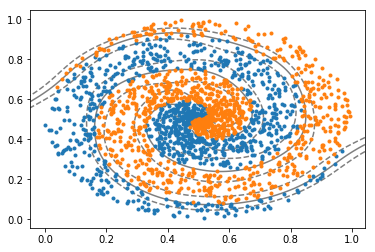

SVM Classification fidelity: 0.8955


In [69]:
point_to_plot = 1000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_svc_decision_function(model)
plt.show()
print("SVM Classification fidelity: "+str(svm_scored))

### Naive Bayes

In [70]:
gnb = GaussianNB()
gnb.fit(train_data,label)
print(gnb.score(validate_data,label_validate))
nb=nbayes()
nb.learn(train_data,label)
nb_scored=nb.score(validate_data,label_validate)
print("NB Classification fidelity: "+str(nb_scored)+ " %")

0.607
NB Classification fidelity: 0.607 %


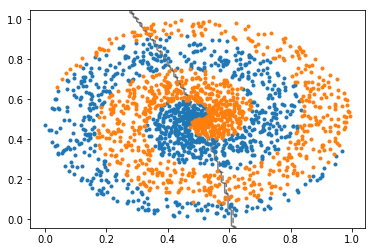

NB Classification fidelity: 0.607 %


In [71]:
point_to_plot = 1000
plt.plot(class0_validate[0:point_to_plot,0], class0_validate[0:point_to_plot,1], '.')
plt.plot(class1_validate[0:point_to_plot,0], class1_validate[0:point_to_plot,1], '.')
plot_nb_decision_function(nb)
plt.show()
print("NB Classification fidelity: "+str(nb_scored)+ " %")

## Summary: Spiral Distributions

In [72]:
dataframe_spiral=pd.DataFrame([tn_scored,svm_scored,nb_scored],index=["TN","SVM","NB"],columns=["Spiral"] )
dataframe_spiral

,Spiral
TN,0.9525
SVM,0.8955
NB,0.6070


# Final Summary

In [73]:
pd.concat([dataframe_gauss,dataframe_semi_circ,dataframe_circ,dataframe_spiral],axis=1)

,Gauss,Semi Circular,Circular,Spiral
TN,0.9865,0.9815,0.9450,0.9525
SVM,0.9870,0.9985,0.9935,0.8955
NB,0.9865,0.9560,0.9310,0.6070


# Conclusions